<a href="https://colab.research.google.com/github/SaashaJoshi/tf-keras-examples/blob/master/horse-human_classifier/HorsesHuman_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
-O /tmp/horse-or-human.zip

--2020-03-24 12:07:53--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.9.208, 2607:f8b0:4004:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.9.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  78.5MB/s    in 1.8s    

2020-03-24 12:07:55 (78.5 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
-O /tmp/validation-horse-or-human.zip

--2020-03-24 12:08:14--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.240, 2607:f8b0:4004:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2020-03-24 12:08:15 (84.1 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [0]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [0]:
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [0]:
# Training Images
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [0]:
# Validation Images
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [7]:
# Verify
train_horse_names = os.listdir(train_horse_dir) 
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir) 
print(train_human_names[:10])

['horse41-2.png', 'horse05-6.png', 'horse31-9.png', 'horse42-9.png', 'horse28-8.png', 'horse45-7.png', 'horse21-8.png', 'horse46-0.png', 'horse31-4.png', 'horse25-1.png']
['human04-27.png', 'human13-23.png', 'human17-18.png', 'human17-09.png', 'human03-20.png', 'human16-15.png', 'human14-09.png', 'human02-14.png', 'human05-15.png', 'human07-15.png']


In [8]:
# Verify Validation
validation_horse_names = os.listdir(validation_horse_dir) 
print(validation_horse_names[:10])
validation_human_names = os.listdir(validation_human_dir) 
print(validation_human_names[:10])

['horse2-011.png', 'horse2-201.png', 'horse1-105.png', 'horse5-565.png', 'horse4-541.png', 'horse4-501.png', 'horse1-298.png', 'horse2-368.png', 'horse6-089.png', 'horse3-469.png']
['valhuman02-00.png', 'valhuman02-12.png', 'valhuman05-26.png', 'valhuman03-16.png', 'valhuman05-16.png', 'valhuman05-21.png', 'valhuman01-07.png', 'valhuman02-21.png', 'valhuman05-12.png', 'valhuman01-10.png']


In [9]:
print('Total horse training images: ', len(os.listdir(train_horse_dir)))
print('Total human training images: ', len(os.listdir(train_human_dir)))

print('Total horse validation images: ', len(os.listdir(validation_horse_dir)))
print('Total human validation images: ', len(os.listdir(validation_human_dir)))

Total horse training images:  500
Total human training images:  527
Total horse validation images:  128
Total human validation images:  128


In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

rows = 4
columns = 4
pic_index = 0

# Display random images

In [10]:
import tensorflow as tf
from tensorflow import keras

In [11]:
# model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', imput_shape = (300, 300, 3),
#                                                      keras.layers.MaxPooling2D(2, 2),
#                                                      keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
#                                                      keras.layers.MaxPooling2D(2, 2),
#                                                      keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
#                                                      keras.layers.MaxPooling2D(2, 2),
#                                                      keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
#                                                      keras.layers.MaxPooling2D(2, 2),
#                                                      keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
#                                                      keras.layers.MaxPooling2D(2, 2),
#                                                      keras.layers.Flatten(),
#                                                      keras.layers.Dense(512, activation = 'relu'),
#                                                      keras.layers.Dense(1, activation = 'sigmoid')
#                                                      ])


model=keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation=tf.nn.relu, input_shape=(300, 300, 3)), 
    keras.layers.MaxPooling2D(2, 2), 
    
    keras.layers.Conv2D(32, (3, 3), activation=tf.nn.relu), 
    keras.layers.MaxPooling2D(2, 2), 
    
    keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu), 
    keras.layers.MaxPooling2D(2, 2), 
    
    keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu), 
    keras.layers.MaxPooling2D(2, 2), 

    keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu), 
    keras.layers.MaxPooling2D(2, 2), 
    
    keras.layers.Flatten(), 
    keras.layers.Dense(512, activation=tf.nn.relu), 
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [13]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss = 'binary_crossentropy', 
              optimizer = RMSprop(lr = 0.001), 
              metrics = ['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/', 
    target_size = (300, 300), 
    batch_size = 128, 
    class_mode = 'binary'    
)

Found 1027 images belonging to 2 classes.


In [15]:
validation_datagen = ImageDataGenerator(rescale = 1/255)
validation_generator = validation_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human/', 
    target_size = (300, 300), 
    batch_size = 32, 
    class_mode = 'binary'    
)

Found 256 images belonging to 2 classes.


In [16]:
history = model.fit_generator(
    train_generator, 
    steps_per_epoch = 8, 
    epochs = 15, 
    validation_data = validation_generator, 
    validation_steps = 8
)

Epoch 1/15
8/8 [==============================] - 12s 1s/step - loss: 0.9860 - acc: 0.5640 - val_loss: 0.6714 - val_acc: 0.7734
Epoch 2/15
8/8 [==============================] - 7s 821ms/step - loss: 0.6546 - acc: 0.5907 - val_loss: 2.1918 - val_acc: 0.5117
Epoch 3/15
8/8 [==============================] - 6s 780ms/step - loss: 0.6381 - acc: 0.6752 - val_loss: 0.5167 - val_acc: 0.8164
Epoch 4/15
8/8 [==============================] - 6s 774ms/step - loss: 0.6077 - acc: 0.7864 - val_loss: 0.5798 - val_acc: 0.7891
Epoch 5/15
8/8 [==============================] - 7s 893ms/step - loss: 0.3346 - acc: 0.8779 - val_loss: 0.7283 - val_acc: 0.8750
Epoch 6/15
8/8 [==============================] - 6s 794ms/step - loss: 0.2467 - acc: 0.9055 - val_loss: 0.8240 - val_acc: 0.8516
Epoch 7/15
8/8 [==============================] - 6s 780ms/step - loss: 0.2076 - acc: 0.9143 - val_loss: 0.9792 - val_acc: 0.8281
Epoch 8/15
8/8 [==============================] - 6s 789ms/step - loss: 0.1779 - acc: 0.9177

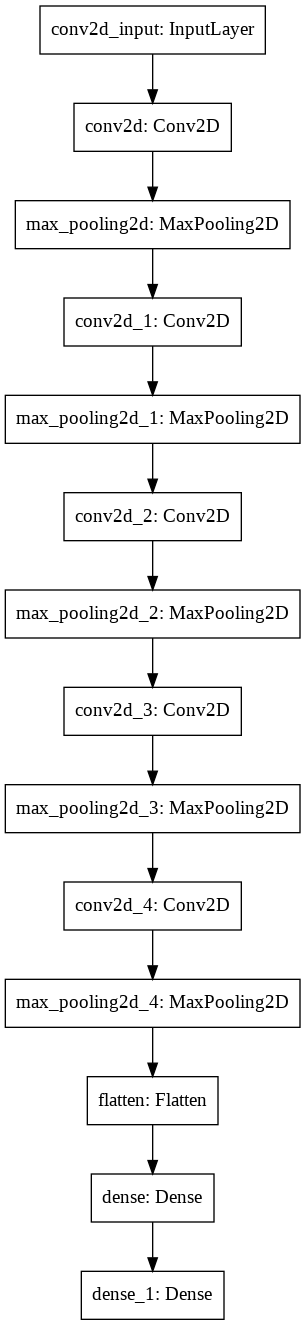

In [18]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size = (300, 300))
  x = image.img_to_array(img)
  y = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print(classes[0])

  if classes[0] > 0.5:
    print(fn + 'is a human')
  else:
    print(fn + 'is a horse')

Saving horse-3481756_960_720.webp to horse-3481756_960_720.webp


ValueError: ignored